# **Prepare rules for the my book the data sets**
1. Try different values of support and
   confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori
   algorithm
3. Visulize the obtained rules using different plots



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 2500x1250 with 0 Axes>

In [2]:
mm = pd.read_csv('/content/my_movies.csv')
mm

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
mm.shape

(10, 15)

In [4]:
mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
mm1 = mm.iloc[:,5:]
mm1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [6]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))

In [7]:
uni(mm1)


 All Unique Value in Sixth Sense
[0 1]
Total no of unique values 2

 All Unique Value in Gladiator
[0 1]
Total no of unique values 2

 All Unique Value in LOTR1
[0 1]
Total no of unique values 2

 All Unique Value in Harry Potter1
[0 1]
Total no of unique values 2

 All Unique Value in Patriot
[0 1]
Total no of unique values 2

 All Unique Value in LOTR2
[0 1]
Total no of unique values 2

 All Unique Value in Harry Potter2
[0 1]
Total no of unique values 2

 All Unique Value in LOTR
[0 1]
Total no of unique values 2

 All Unique Value in Braveheart
[0 1]
Total no of unique values 2

 All Unique Value in Green Mile
[0 1]
Total no of unique values 2


In [8]:
count = mm1.sum()
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


# Ploting Barplot

Text(0.5, 1.0, 'Movies Purchase Frequency')

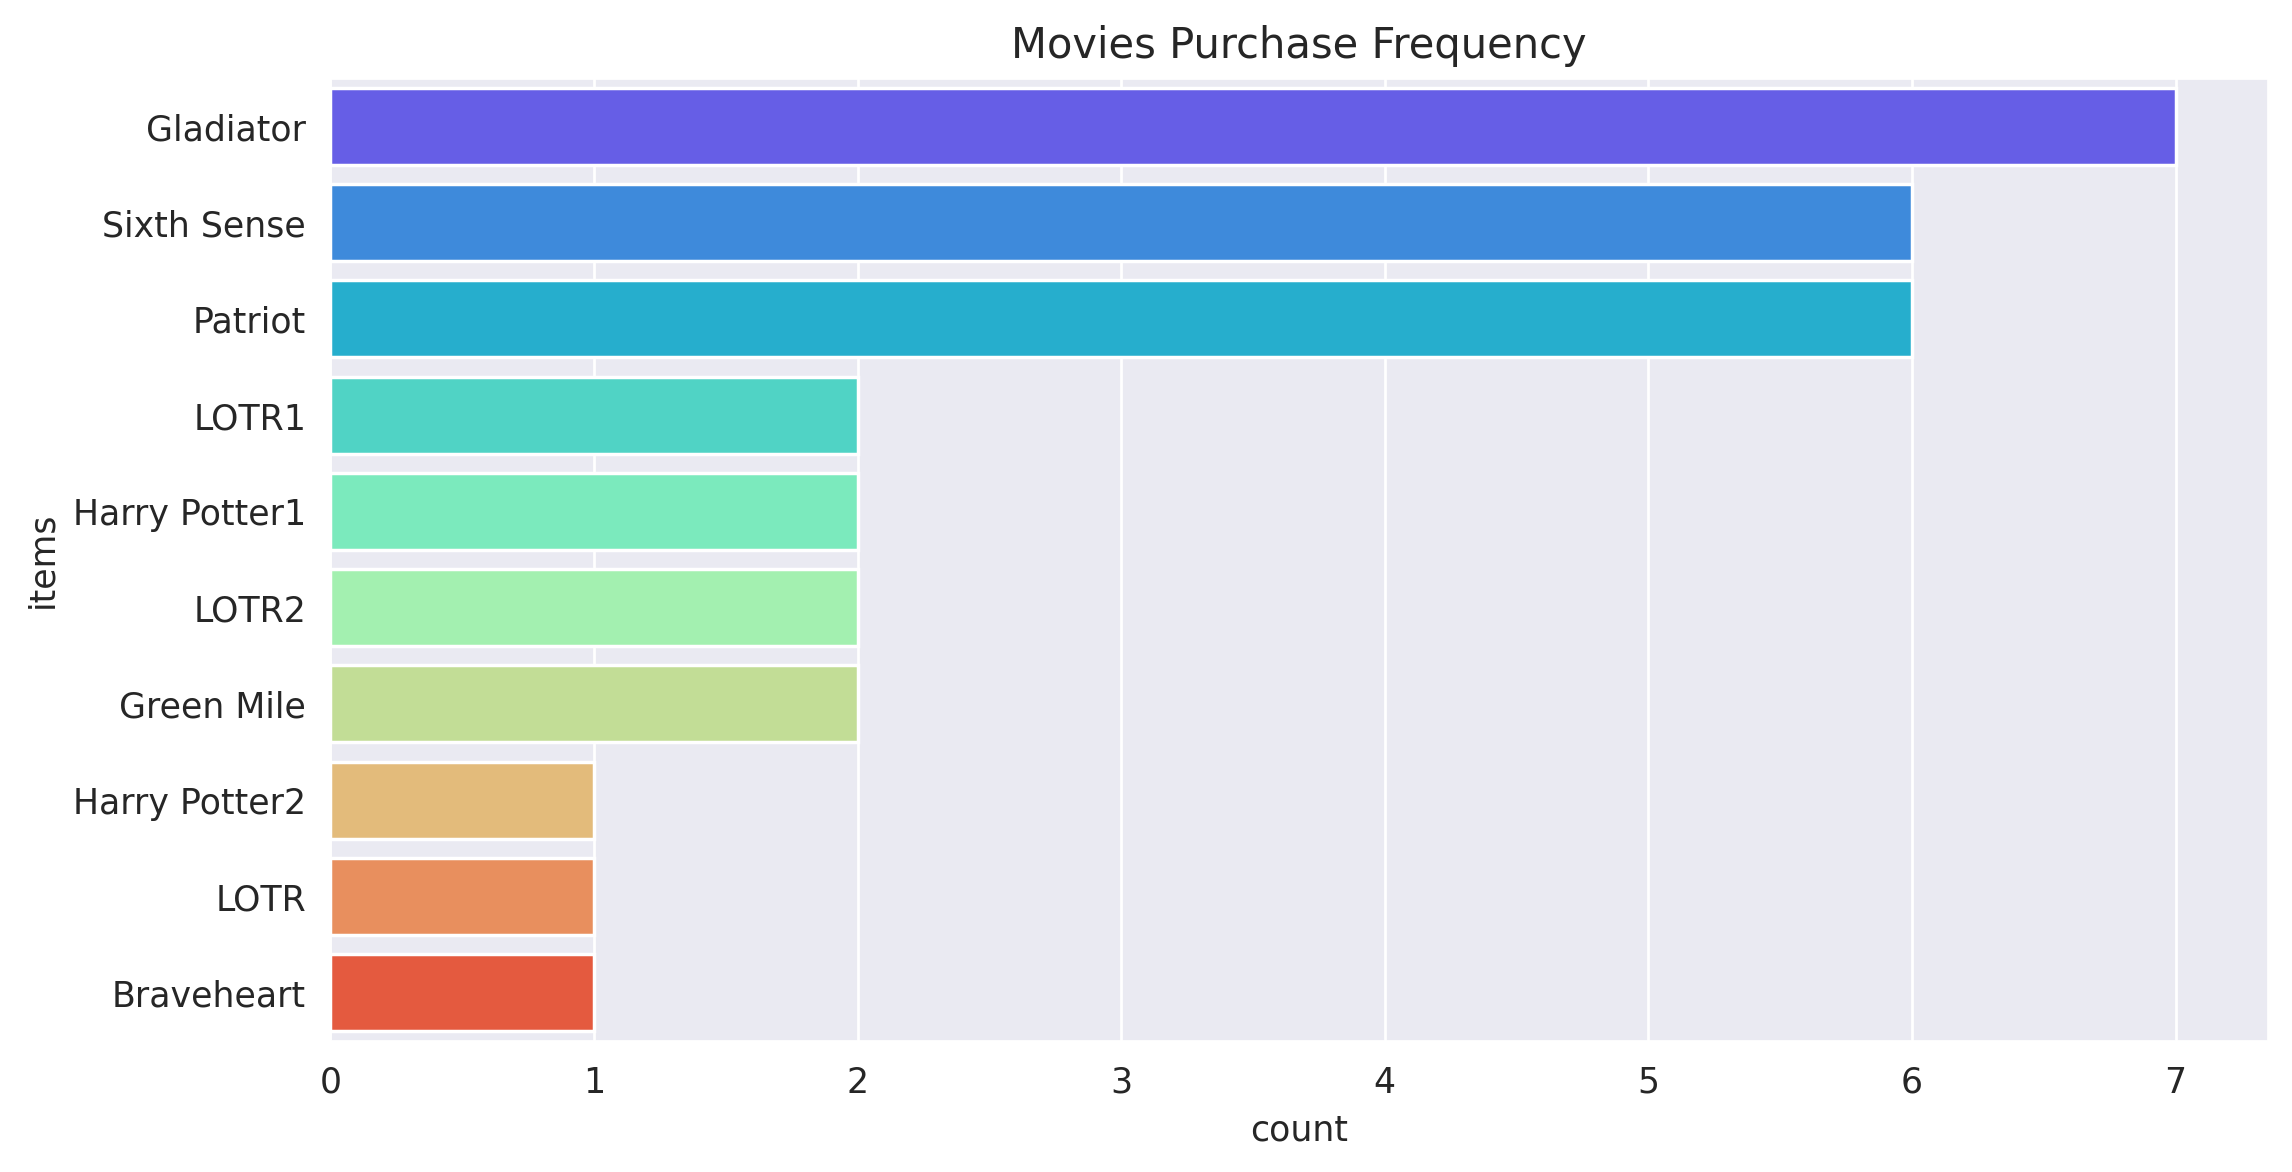

In [9]:
sns.barplot(x = 'count', y = 'items', data = count, palette = 'rainbow')
plt.title('Movies Purchase Frequency')

## Ploting Pieplot

Text(0.5, 1.0, 'Market Share Of Each Movie')

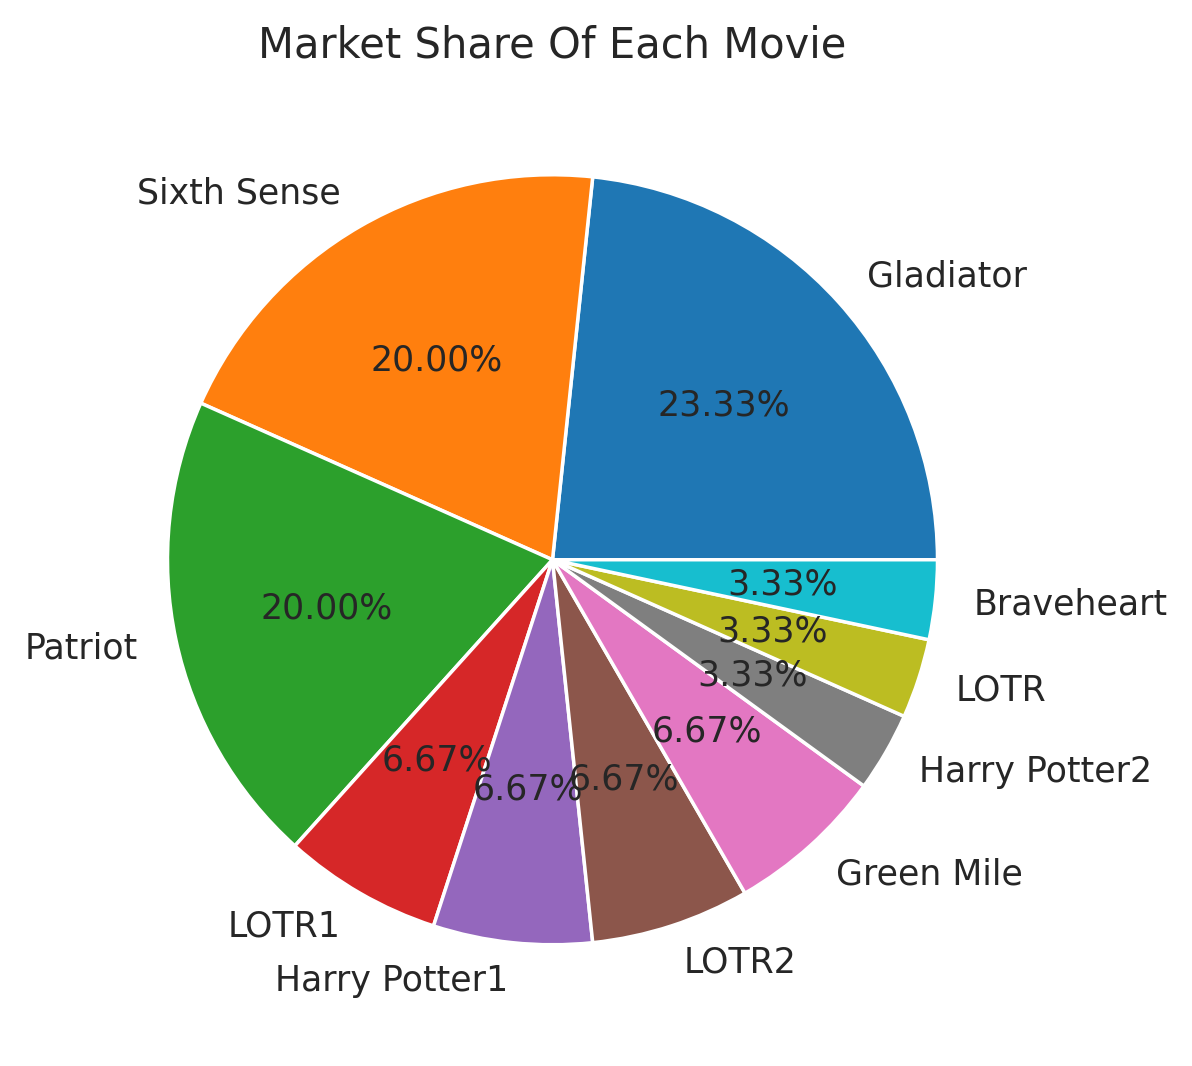

In [10]:
plt.pie(count['count'], labels = count['items'], autopct = '%.2f%%')
plt.title('Market Share Of Each Movie')

# Apriori Algorithm
1. Association rules with 10% Support and 70% confidence

In [11]:
frequent_itemsets =apriori(mm1,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [12]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
246,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(LOTR2),"(LOTR1, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [13]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
model_20_lift1=rules[rules.lift>1]
model_20_lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
246,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(LOTR2),"(LOTR1, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


# Visualization Of Obtained Rule
Ploting Scatter And BarPlot

In [14]:
vm_15 = pd.DataFrame(
    {
        'support' : model_20_lift1['support'],
        'confidence' : model_20_lift1['confidence'],
        'lift' : round(model_20_lift1['lift'])
    }
)

vm_15

,support,confidence,lift
0,0.5,0.833333,1.0
1,0.5,0.714286,1.0
6,0.4,0.666667,1.0
7,0.4,0.666667,1.0
10,0.1,0.166667,2.0
...,...,...,...
245,0.1,0.166667,2.0
246,0.1,0.500000,5.0
247,0.1,0.500000,5.0
248,0.1,0.500000,5.0


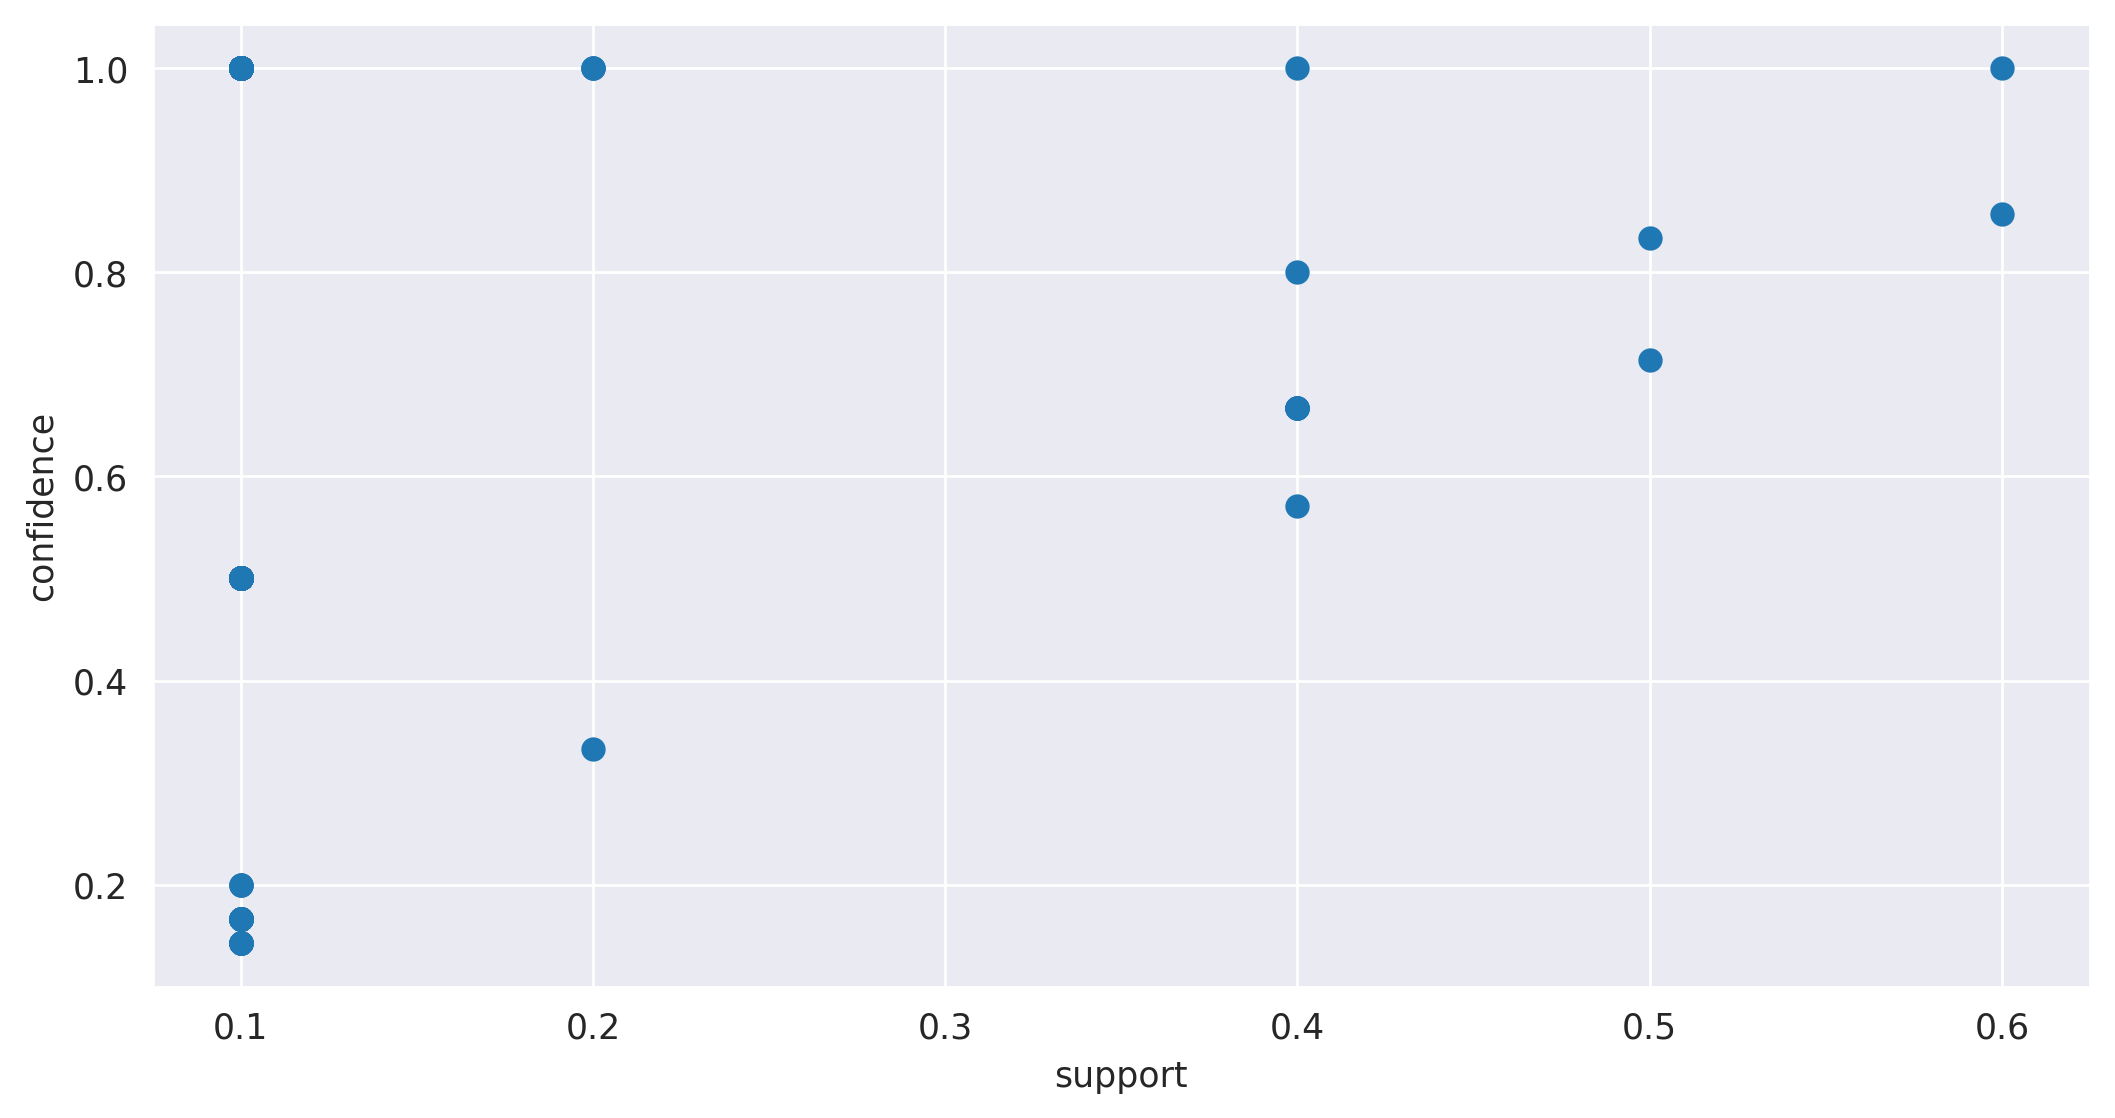

In [17]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## 1. Association rules with 5% Support and 90% confidence

In [18]:
# with 5% support
frequent_itemsets2=apriori(mm1,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [19]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
233,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
234,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
235,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
236,(LOTR2),"(LOTR1, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [20]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
233,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
234,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
235,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
236,(LOTR2),"(LOTR1, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


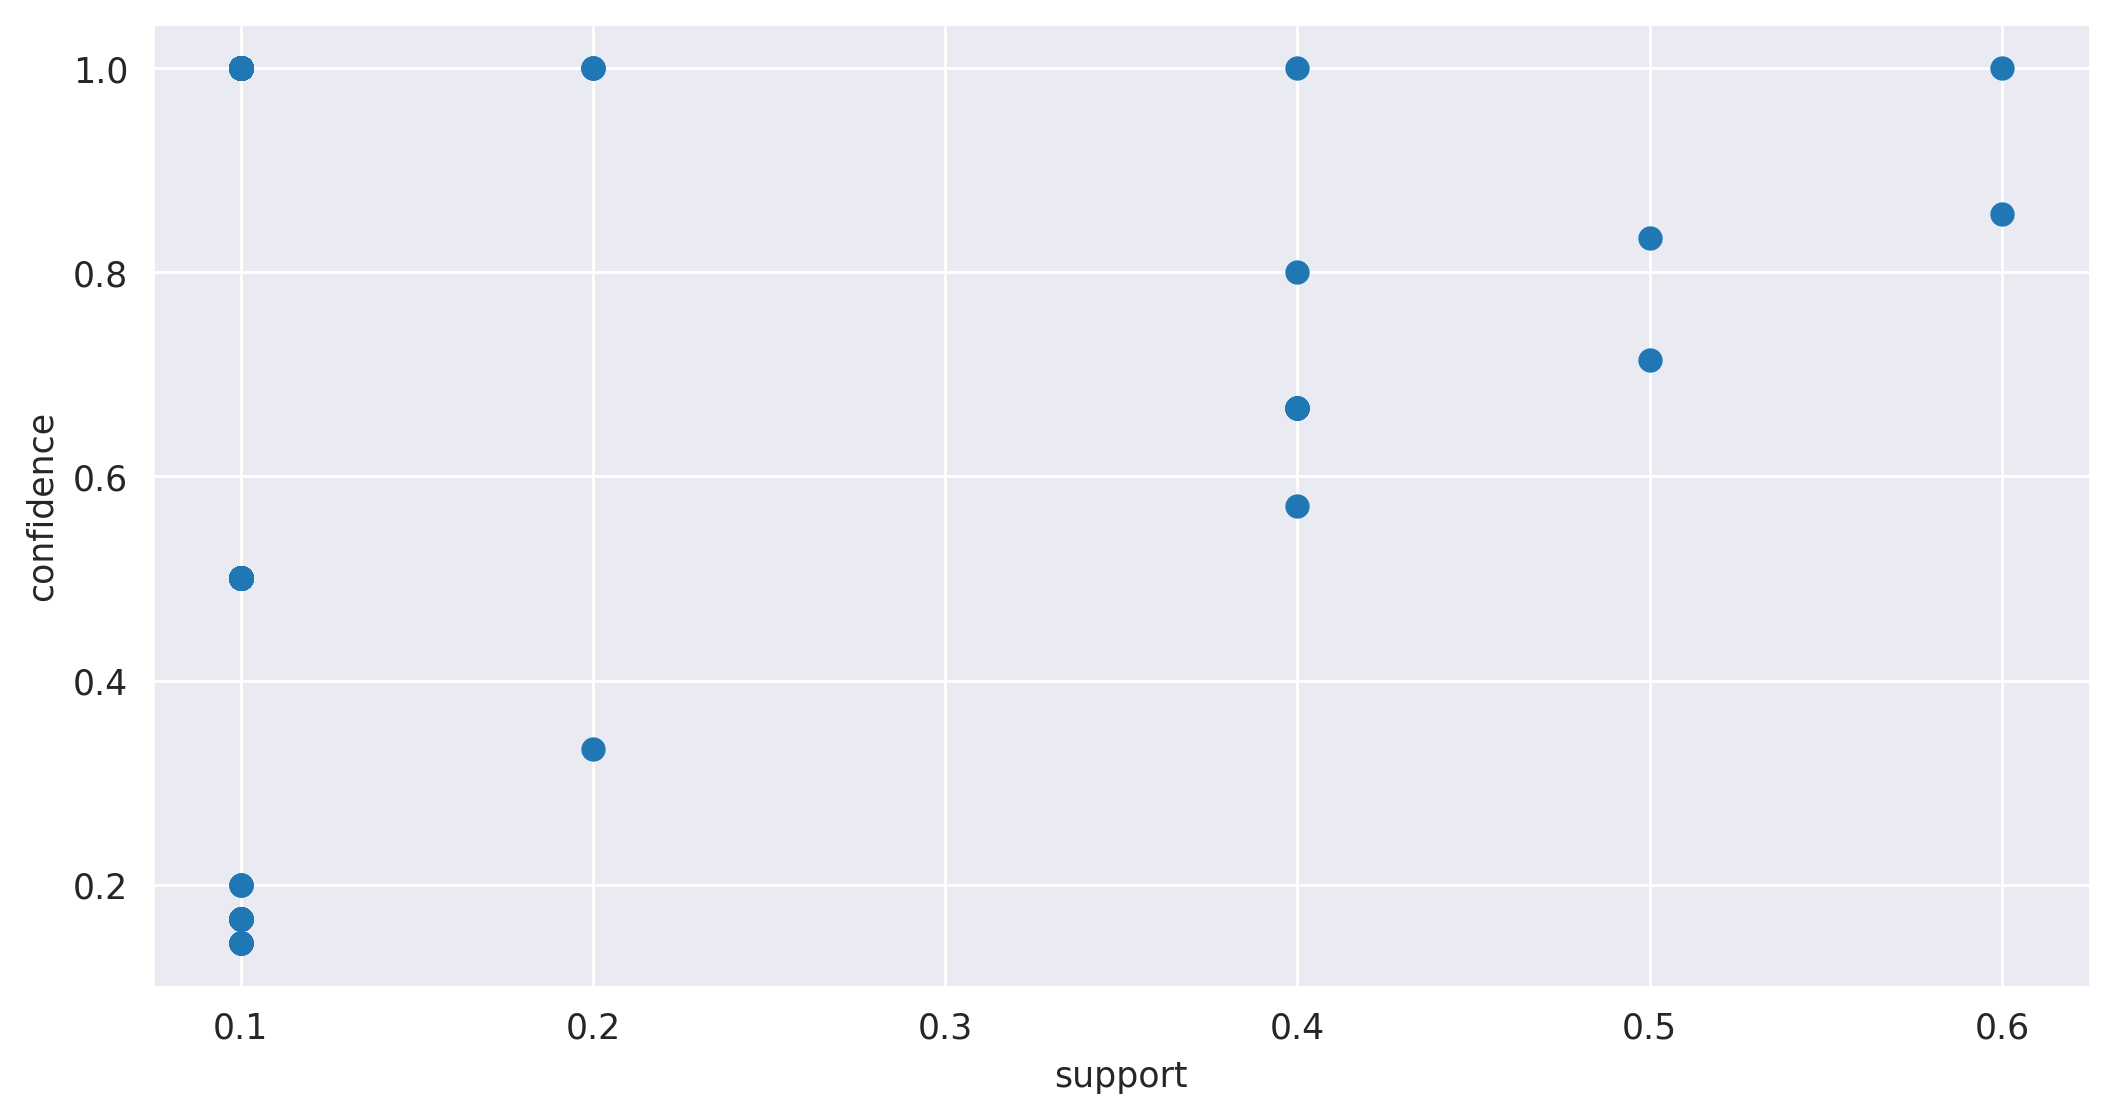

In [21]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()